In [1]:
#Problem: Predict the price of Corolla cars

In [2]:
# Importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the Toyota Corolla dataset.
corolla = pd.read_csv('ToyotaCorolla.csv',encoding='latin-1')

In [4]:
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
#Selecting the required columns
corolla = corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
#Descriptive statistics about this dataset.
corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


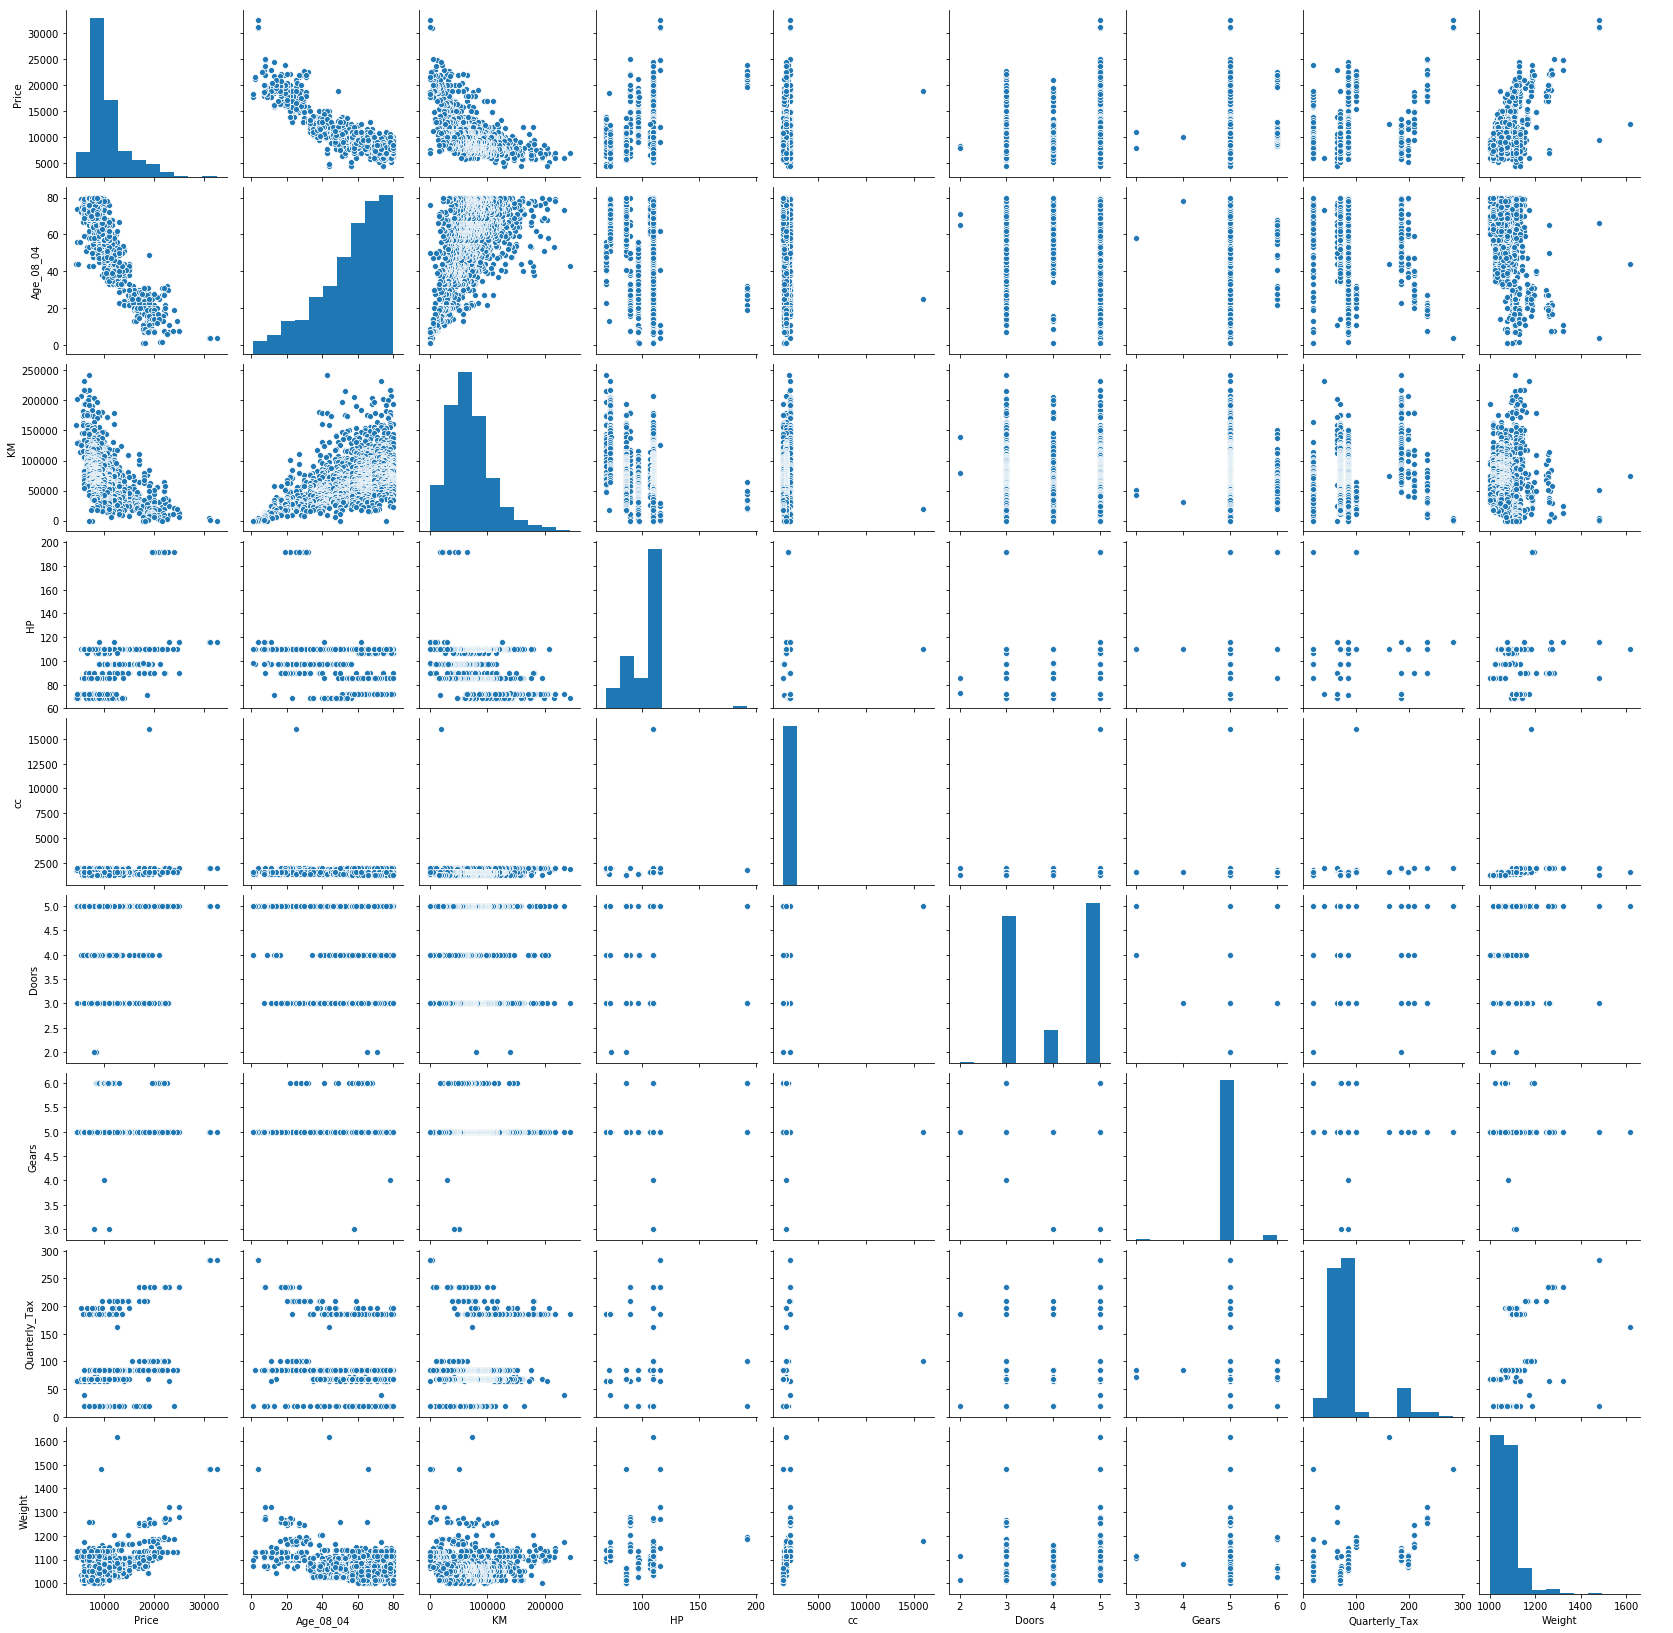

In [7]:
#Creating scatterplots to visualize the relationship between continuous variables.
sns.pairplot(corolla)

In [8]:
#Creating a correlation matrix to understand the correlation coefficients between the various variables.
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
#Creating a basic model with all the variables without any transformation.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = corolla.iloc[:,1:]
y = corolla['Price']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:32:12   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#The model achieves an R^2 score of 0.864. However, cc and doors are insignificant. 

In [11]:
#Before attempting to drop the insignificant variables, we can see whether any influential observations are 
# present in the data which have an influence on the coefficients of the variables.

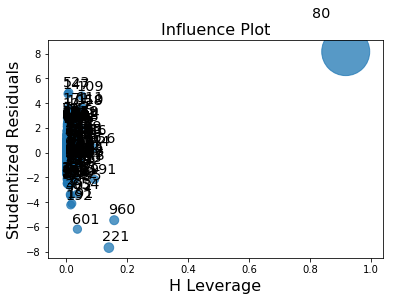

In [12]:
sm.graphics.influence_plot(model)
plt.show()

In [14]:
#We can observe that the data point at index 80 is an influential point. We can drop this data point
#and create a model with the remaining data points.
x = corolla.iloc[:,1:].drop(index=80,axis=0)
y = corolla['Price'].drop(index=80,axis=0)

In [15]:
x = sm.add_constant(x)

model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:33:27   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#The performance of the model has improved to 0.869. Now doors and gears are insignificant. This
# change in the standard errors can be attributed to the presence of multi-collinearity between the variables.
#We can compute the VIF scores to determine if there is any multicollinearity between the variables.

In [17]:
vif = pd.DataFrame()
vif['vif-factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features'] = x.columns

In [18]:
vif

,vif-factor,features
0,1592.445199,const
1,1.887229,Age_08_04
2,1.909570,KM
3,1.583835,HP
4,2.754405,cc
5,1.163178,Doors
6,1.100907,Gears
7,2.859861,Quarterly_Tax
8,2.864117,Weight


In [19]:
#Weight has the highest VIF value and inflates the variance present in the data the highest.
#We can drop weight variable from the model and see if the performance has improved.

In [20]:
x = corolla.iloc[:,1:].drop(index=80,axis=0)
y = corolla['Price'].drop(index=80,axis=0)

x.drop('Weight',axis=1,inplace=True)

x = sm.add_constant(x)

model2 = sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1066.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:34:42   Log-Likelihood:                -12483.
No. Observations:                1435   AIC:                         2.498e+04
Df Residuals:                    1427   BIC:                         2.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.047e+04   1137.025      9.210      0.000    8241.932    1.27e+04
Age_08_04      -136.7343      2.658    -51.446      0.000    -141.948    -131.521
KM               -0.0194      0.001    -13.728      0.000      -0.022      -0.017
HP               45.7608      3.202     14.290      0.000      39.479      52.043
cc               -0.4138      0.315     -1.314      0.189      -1.032       0.204
Doors           158.9542     41.965      3.788      0.000      76.634     241.274
Gears           605.6992    213.688      2.835      0.005     186.523    1024.875
Quarterly_Tax    17.8325      1.484     12.014      0.000      14.921      20.744
==============================================================================
Omnibus:                      214.820   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.078
Skew:                           0.704   Prob(JB):                    2.22e-168
Kurtosis:                       6.306   Cond. No.                     2.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#The cc variable is insignificant so we can remove this variable from the model as it has a high
#VIF as well.

In [22]:
x.drop('cc',axis=1,inplace=True)
model3 = sm.OLS(y,x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1243.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:35:15   Log-Likelihood:                -12484.
No. Observations:                1435   AIC:                         2.498e+04
Df Residuals:                    1428   BIC:                         2.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.008e+04   1097.516      9.185      0.000    7927.661    1.22e+04
Age_08_04      -136.4314      2.648    -51.513      0.000    -141.627    -131.236
KM               -0.0199      0.001    -14.734      0.000      -0.023      -0.017
HP               44.0174      2.915     15.099      0.000      38.299      49.736
Doors           157.8064     41.967      3.760      0.000      75.483     240.129
Gears           617.2881    213.560      2.890      0.004     198.363    1036.213
Quarterly_Tax    16.5302      1.105     14.957      0.000      14.362      18.698
==============================================================================
Omnibus:                      212.577   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.584
Skew:                           0.695   Prob(JB):                    1.27e-167
Kurtosis:                       6.305   Cond. No.                     2.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#The performance of the model is not affected after dropping cc and all the variables are significant.

In [24]:
#We can attempt some transformations to see if the performance of the model improves.
#Attempting square root transformation of KM and Age_08_04 variables.

In [25]:
x['sqrt(KM)'] = np.sqrt(x['KM'])
x['sqrt(Age_08_04)'] = np.sqrt(x['Age_08_04'])

model4 = sm.OLS(y,x).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1211.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:35:54   Log-Likelihood:                -12322.
No. Observations:                1435   AIC:                         2.466e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.875e+04   1082.287     17.320      0.000    1.66e+04    2.09e+04
Age_08_04         110.6378     13.768      8.036      0.000      83.630     137.646
KM                 -0.0374      0.005     -7.786      0.000      -0.047      -0.028
HP                 41.8203      2.632     15.887      0.000      36.657      46.984
Doors             129.2019     37.550      3.441      0.001      55.543     202.860
Gears             765.8074    191.077      4.008      0.000     390.985    1140.630
Quarterly_Tax      15.2636      0.990     15.412      0.000      13.321      17.206
sqrt(KM)           10.9714      2.617      4.192      0.000       5.838      16.105
sqrt(Age_08_04) -3317.7096    186.977    -17.744      0.000   -3684.489   -2950.931
==============================================================================
Omnibus:                      137.143   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.464
Skew:                           0.379   Prob(JB):                    2.41e-121
Kurtosis:                       5.952   Cond. No.                     2.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Model 4 gives the best R^2 score indicating that square root transformation of KM and Age_08_04 provides the 
# best fit in comparison to other models.